# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

from api_keys import weather_api_key

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # pprint(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind =  city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | retreat
Processing Record 2 of Set 1 | paramonga
Processing Record 3 of Set 1 | nyandoma
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | lagoa
Processing Record 7 of Set 1 | flagstaff
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | tanjung pandan
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | puerto baquerizo moreno
Processing Record 12 of Set 1 | mil'kovo
Processing Record 13 of Set 1 | nemuro
Processing Record 14 of Set 1 | ulaangom
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | olonkinbyen
Processing Record 18 of Set 1 | stanley
Processing Record 19 of Set 1 | namibe
Processing Record 20 of Set 1 | alta
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | port alfred
Processing Re

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,retreat,38.8245,-85.8533,270.92,53,8,0.45,US,1736446293
1,paramonga,-10.6667,-77.8333,296.47,75,61,4.34,PE,1736446294
2,nyandoma,61.6690,40.1991,258.00,99,100,2.49,RU,1736446295
3,ushuaia,-54.8000,-68.3000,285.45,49,90,2.58,AR,1736446243
4,yellowknife,62.4560,-114.3525,247.44,76,20,2.06,CA,1736446298


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,retreat,38.8245,-85.8533,270.92,53,8,0.45,US,1736446293
1,paramonga,-10.6667,-77.8333,296.47,75,61,4.34,PE,1736446294
2,nyandoma,61.6690,40.1991,258.00,99,100,2.49,RU,1736446295
3,ushuaia,-54.8000,-68.3000,285.45,49,90,2.58,AR,1736446243
4,yellowknife,62.4560,-114.3525,247.44,76,20,2.06,CA,1736446298


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

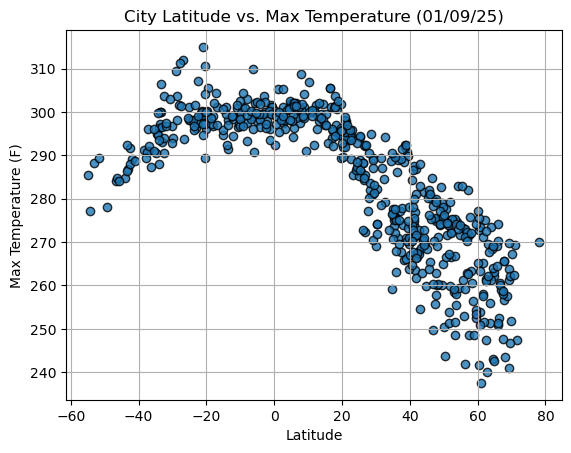

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

Highest temperature is found at 0 Lattitude and as the latitude increases or dereases, temperature drops.

#### Latitude Vs. Humidity

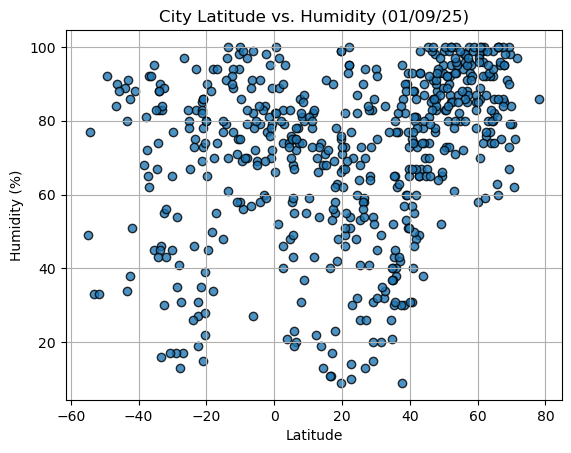

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

Polar regions have lower humidity and as latitude gets higher,humidity gets higher in southern hemisphere.

#### Latitude Vs. Cloudiness

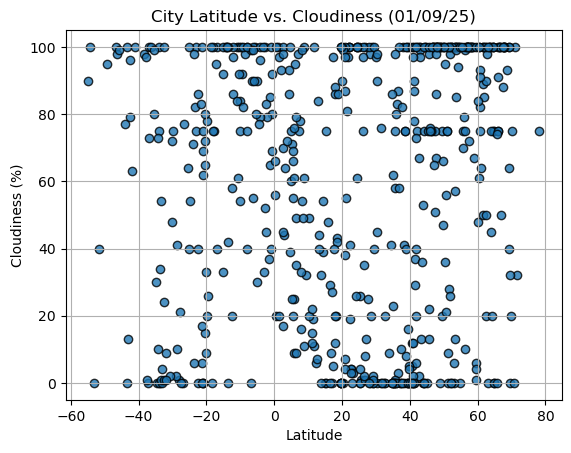

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

Cloudiness data is widely spread across the latitude.

#### Latitude vs. Wind Speed Plot

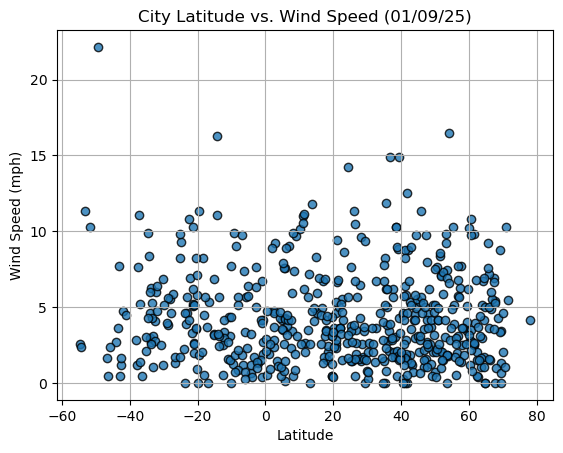

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

Wind speed data is widely spread across the latitude.

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,retreat,38.8245,-85.8533,270.92,53,8,0.45,US,1736446293
2,nyandoma,61.6690,40.1991,258.00,99,100,2.49,RU,1736446295
4,yellowknife,62.4560,-114.3525,247.44,76,20,2.06,CA,1736446298
5,lagoa,39.0500,-27.9833,290.90,90,100,8.85,PT,1736446299
6,flagstaff,35.1981,-111.6513,273.71,43,0,8.23,US,1736446032


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,paramonga,-10.6667,-77.8333,296.47,75,61,4.34,PE,1736446294
3,ushuaia,-54.8000,-68.3000,285.45,49,90,2.58,AR,1736446243
8,tanjung pandan,-2.7500,107.6500,300.00,84,100,4.99,ID,1736446302
9,bredasdorp,-34.5322,20.0403,294.92,67,0,9.86,ZA,1736446303
10,puerto baquerizo moreno,-0.9000,-89.6000,301.70,70,40,6.69,EC,1736446304


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8615784288357425


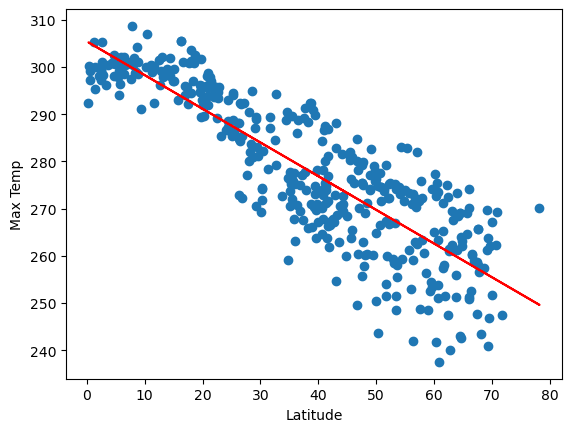

In [44]:
# # Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(21,27))

# # # Linear regression on Northern Hemisphere
# # x_values= northern_hemi_df['Lat']
# # y_values =northern_hemi_df['Max Temp']


# # (slope, intercept, rvalue,pvalue,stderr) = linregress(x_values,y_values)
# # regress_values = x_values*slope+intercept
# # line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# # (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# # line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# # plt.annotate(line_eq,(10,100),fontsize=15,color="red")


# # plt.scatter(x_values, y_values)
# # plt.plot(x_values,regress_values,'r-')
# # plt.annotate(line_eq,(20,15),fontsize=15,color="red")
# # # plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))
# # plt.xlabel('Latitude')
# # plt.ylabel('Max Temp')
# plt.show()

# x = northern_hemi_df['Lat']
# y = northern_hemi_df['Max Temp']
# plt.scatter(x,y)
# plt.plot(x, regress_values, "r-")

# #Annotate lin. regress.
# plt.annotate(line_eq,(20,37),fontsize=16, color="red")

# #Plot the scatterplot
# plt.xlabel("Lat")
# plt.ylabel("Max Temp")
# plt.title("Latitude vs Max Temp")
# print(f"The r^2 value is: {rvalue**2}")
# plt.show()



The r-squared is: 0.5502772443824997


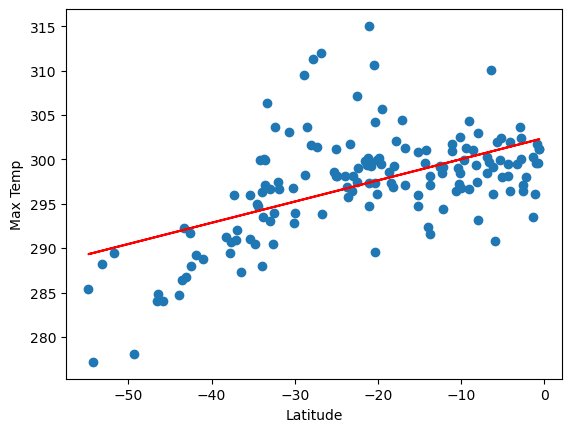

In [26]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(-55,90))

Discussion about the linear relationship: Northern Hemisphere r^2: has a moderate relationship between temperature and latitude. This means that about -86.15 covers the model, and some of the variability can be explained. While Southern Hemisphere r^2: has a strong relationship between temperature and latitude. This means that about 55.02%, which indicates a moderate to strong relationship. And that the independent variable can explain the variability of the dependent variable.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.4326358103822736


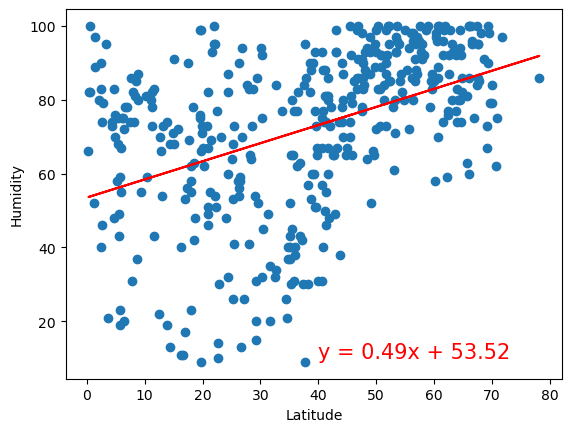

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-squared is: 0.21891083179485205


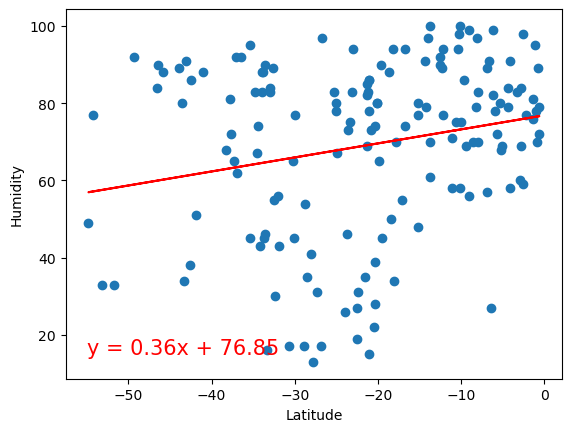

In [46]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(-55,15))


Discussion about the linear relationship: Northern Hemisphere r^2: has a strong relationship between temperature and latitude. This means that 43.26% does cover the model. Southern Hemisphere r^2: has a weak relationship. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.2772368577458774


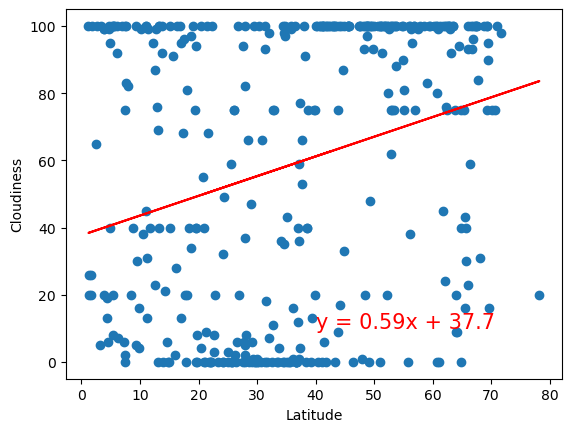

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(40,10))

The r-squared is: 0.343792827791113


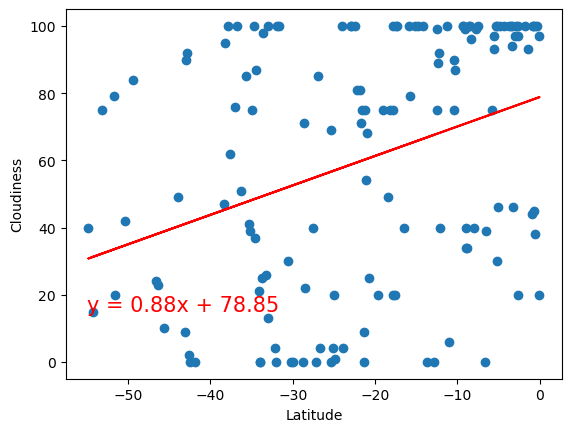

In [45]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(-55,15))

: Northern Hemisphere r^2: has a weak relationship between temperature and latitude. Southern Hemisphere r^2: has a moderate relationship. This means that some of the model is covered.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.0157446025715187


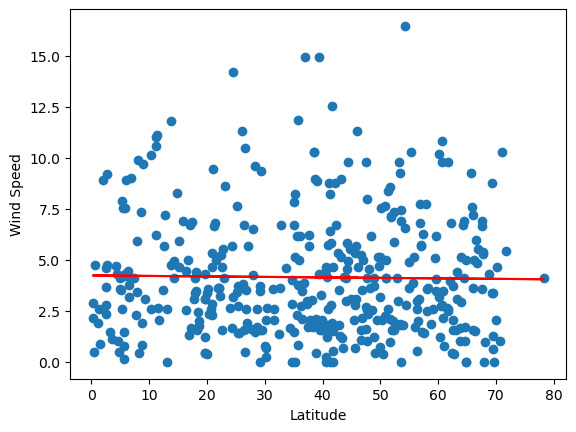

In [48]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(40,25))


# #Northern Hemisphere for  lat vs wind speed
# # Linear regression on Northern Hemisphere for lat vs wind speed
# x_values = northern_hemi_df['Lat']
# y_values = northern_hemi_df['Wind Speed']
# plt.scatter(x_values,y_values)
# plt.plot(x_values, regress_values, "r-")

# #y = mx + b
# #line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# #Annotate lin. regress.
# plt.annotate(line_eq,(20,37),fontsize=16, color="red")

# #Plot the scatterplot
# plt.xlabel("Lat")
# plt.ylabel("Wind Speed")
# plt.title("Latitude vs Wind Speed")
# print(f"The r^2 value is: {rvalue**2}")
# plt.show()

The r-squared is: -0.2956300380187277


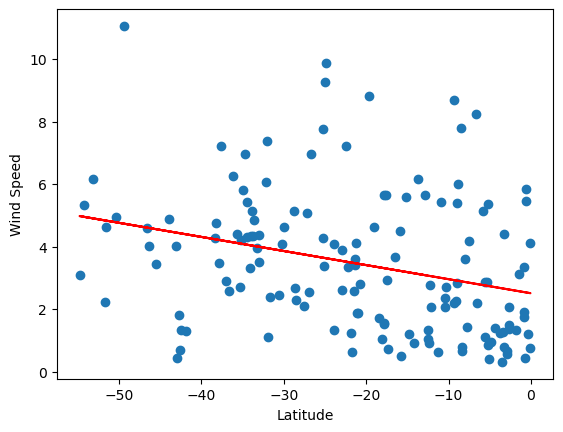

In [47]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(-55,15))


Northern Hemisphere r^2 and Southern Hemisphere r^2: have some coverage of the model.